In [1]:
#import necessary libraries and ignoring warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#uploading files to google drives
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
#loading train and test dataset
df_train = pd.read_csv('train.csv',error_bad_lines=False)
df_test = pd.read_csv('test.csv',error_bad_lines=False)

In [4]:
#checking head of train dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#checking head of test dataset
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#checking the shape of train data.
df_train.shape

(891, 12)

In [7]:
#checking the shape of test data
df_test.shape

(418, 11)

In [8]:
#checking the info of train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#checking the info of test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
#checking the description of test data
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
#checking no  of null values in train dataset
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
#checking no  of null values in test dataset
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

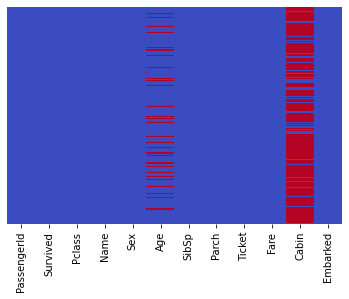

In [13]:
#checking null values in train through heatmap.
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

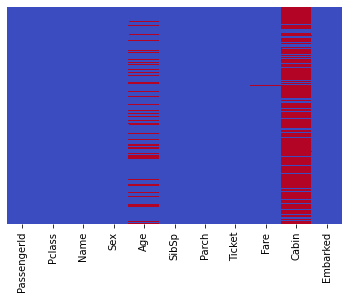

In [14]:
#checking null values in test through heatmap.
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [15]:
#Checking categorical values in the dataset
categorical_feature_columns = list(set(df_train.columns) - set(df_train._get_numeric_data().columns))
categorical_feature_columns

['Cabin', 'Sex', 'Name', 'Embarked', 'Ticket']

In [16]:
categorical_feature_columns = list(set(df_test.columns) - set(df_test._get_numeric_data().columns))
categorical_feature_columns

['Cabin', 'Sex', 'Name', 'Embarked', 'Ticket']

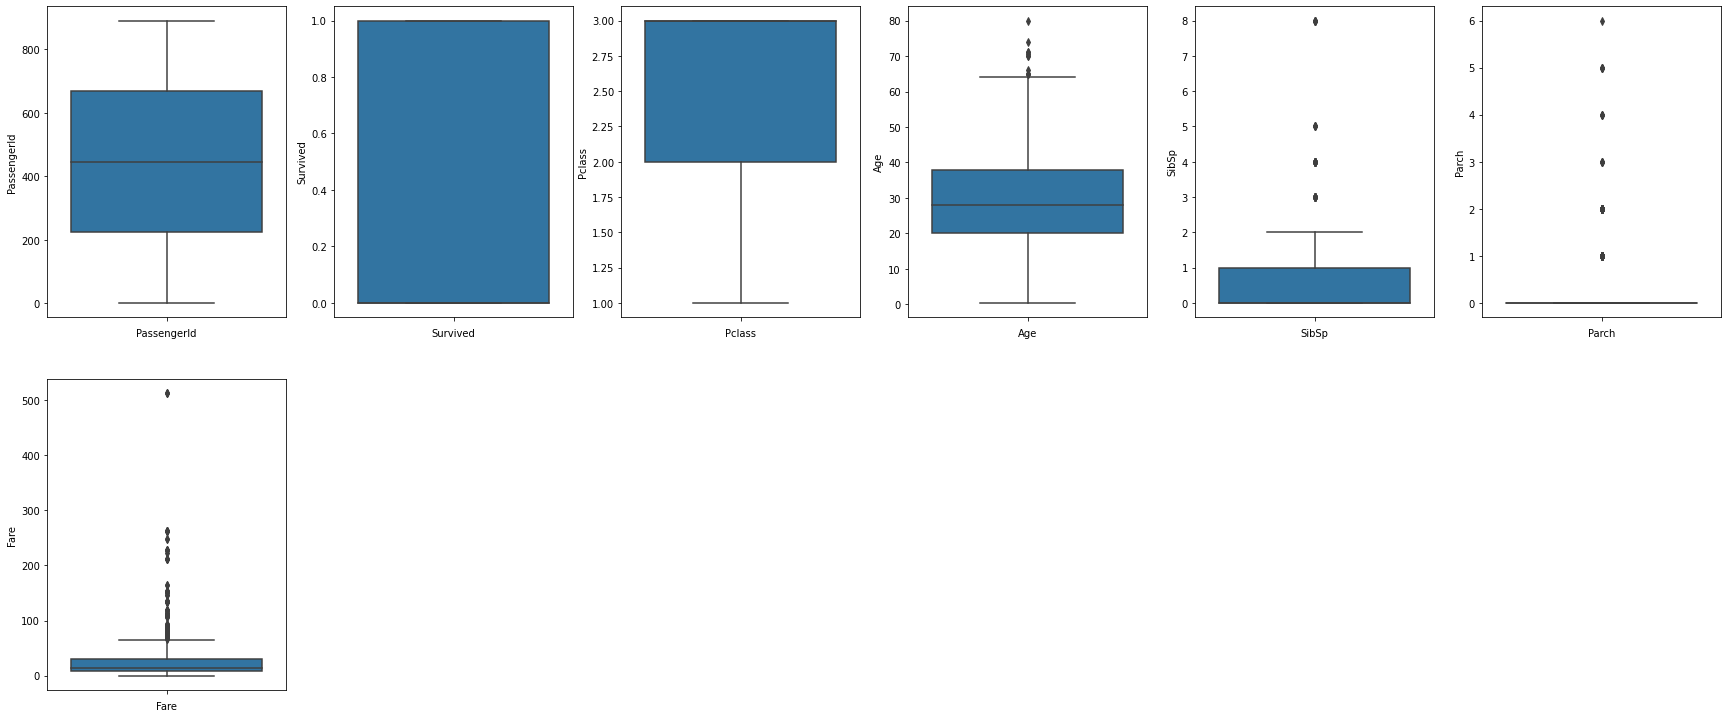

In [17]:
#checking outlier in train dataset.
num_df_train=df_train.drop(['Name', 'Sex', 'Embarked', 'Ticket', 'Cabin'],axis=1)
plt.figure(figsize=(30,40))
k=1
for i in num_df_train.columns:
  plt.subplot(6,6,k)
  sns.boxplot(y=df_train[i])
  plt.xlabel(i)
  k=k+1

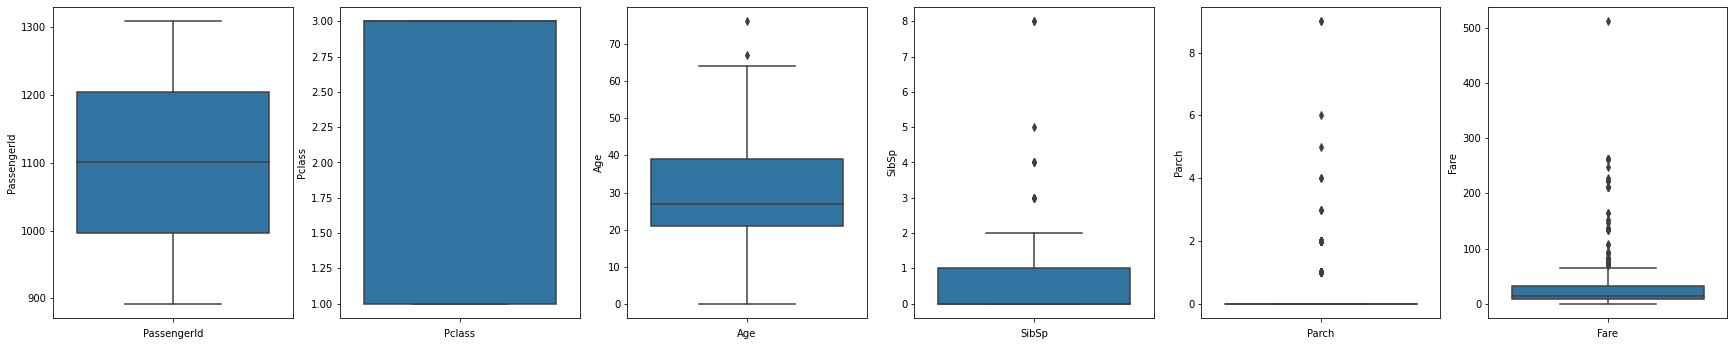

In [18]:
#checking outliers in test dataset.
num_df_test=df_test.drop(['Name', 'Sex', 'Embarked', 'Ticket', 'Cabin'],axis=1)
plt.figure(figsize=(30,40))
k=1
for i in num_df_test.columns:
  plt.subplot(6,6,k)
  sns.boxplot(y=df_test[i])
  plt.xlabel(i)
  k=k+1

In [19]:
#many null values
df_train = df_train.drop(['Cabin'],axis = 1)

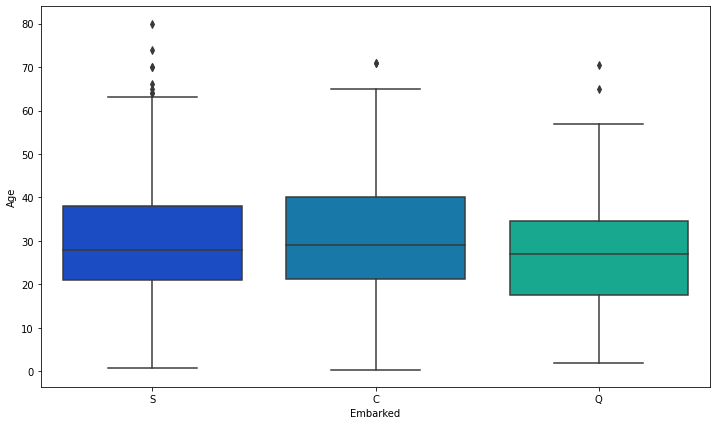

In [20]:
#relation between embark and age
plt.figure(figsize=(12, 7))
sns.boxplot(x='Embarked',y='Age',data=df_train,palette='winter')

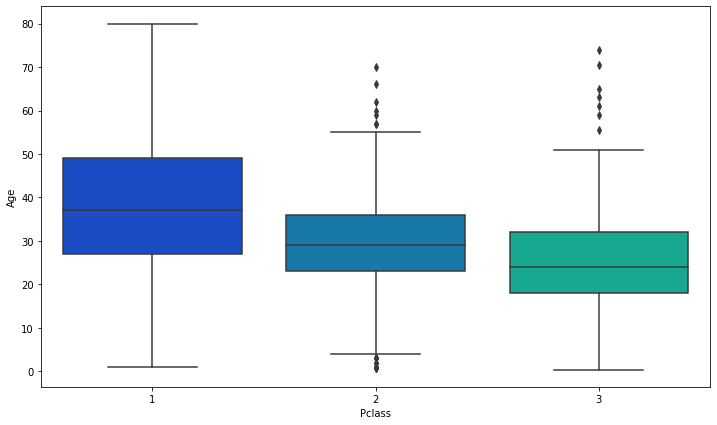

In [21]:
#relation between Pclass and age
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

In [22]:
# impute null values with the mean of the age of passengers of a particular Pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [23]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)

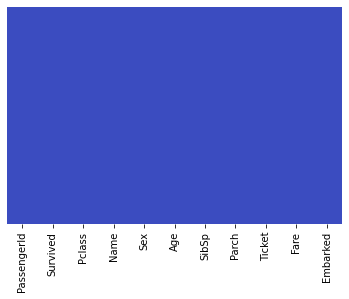

In [24]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [25]:
#first dropping name and ticket number as it has no use
df_train=df_train.drop(['Name', 'Ticket'],axis=1)

In [26]:
#defining the map function and applying 1 for male and 0 for female
varlist = ['Sex']
def binary_map(x):
    return x.map({'male': 1, "female": 0})
df_train[varlist] = df_train[varlist].apply(binary_map)

In [27]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [28]:
#making dummy variable for embarked
status = pd.get_dummies(df_train['Embarked'])

In [29]:
status.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [30]:
status = pd.get_dummies(df_train['Embarked'],drop_first = True)

In [31]:
df_train = pd.concat([df_train, status], axis = 1)

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Q            891 non-null    uint8  
 10  S            891 non-null    uint8  
dtypes: float64(2), int64(6), object(1), uint8(2)
memory usage: 64.5+ KB


In [33]:
#dropping embarked column
df_train = df_train.drop(['Embarked'],axis=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(2)
memory usage: 57.6 KB


In [34]:
def bar_chart(feature):
    survived = df_train[df_train['Survived']==1][feature].value_counts()
    dead = df_train[df_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

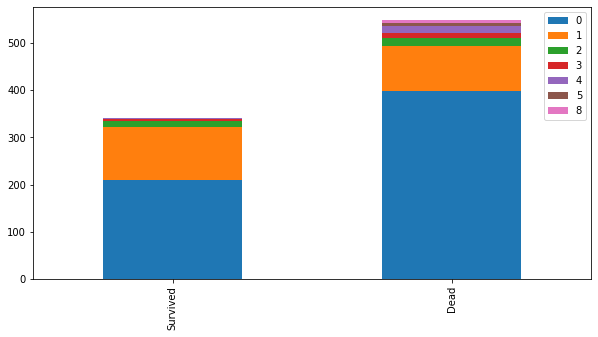

In [35]:
bar_chart('SibSp')

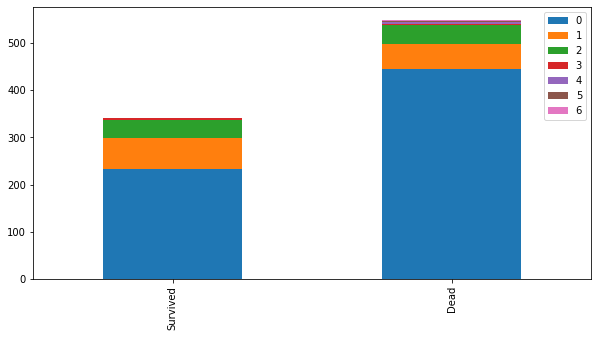

In [36]:
bar_chart('Parch')

In [37]:
data = [df_train]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df_train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [38]:
#dropping Parch and Sibsp
df_train = df_train.drop(['Parch','SibSp'],axis = 1)

In [39]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Q,S,relatives,not_alone
0,1,0,3,1,22.0,7.2500,0,1,1,0
1,2,1,1,0,38.0,71.2833,0,0,1,0
2,3,1,3,0,26.0,7.9250,0,1,0,1
3,4,1,1,0,35.0,53.1000,0,1,1,0
4,5,0,3,1,35.0,8.0500,0,1,0,1


**TEST DATASET (Do all the functions as done in train dataset)**

In [40]:
df_test = df_test.drop(['Cabin'],axis = 1)

In [41]:
df_test['Age'] = df_test[['Age','Pclass']].apply(impute_age,axis=1)

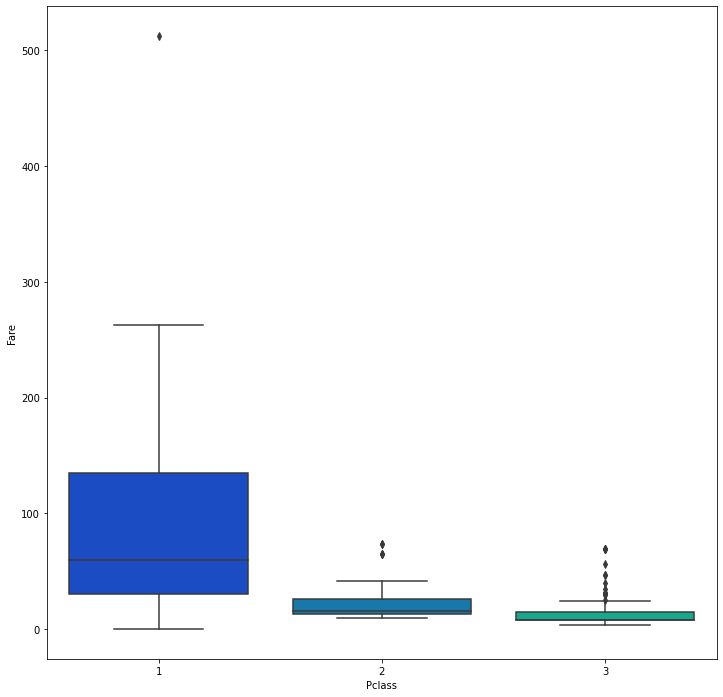

In [42]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='Pclass',y='Fare',data=df_test,palette='winter')

In [43]:
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Fare):
        if Pclass == 1:
            return 60
        elif Pclass == 2:
            return 20
        else:
            return 15
    else:
        return Fare

In [44]:
df_test['Fare'] = df_train[['Fare','Pclass']].apply(impute_fare,axis=1)

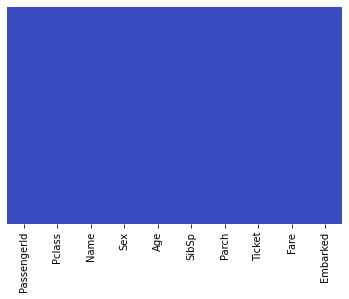

In [45]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [46]:
categorical_feature_columns = list(set(df_test.columns) - set(df_test._get_numeric_data().columns))
categorical_feature_columns

['Ticket', 'Embarked', 'Sex', 'Name']

In [47]:
df_test=df_test.drop(['Name', 'Ticket'],axis=1)

In [48]:
varlist = ['Sex']
def binary_map(x):
    return x.map({'male': 1, "female": 0})
df_test[varlist] = df_test[varlist].apply(binary_map)

In [49]:
status = pd.get_dummies(df_test['Embarked'])
status = pd.get_dummies(df_test['Embarked'],drop_first = True)
df_test = pd.concat([df_test, status], axis = 1)
df_test = df_test.drop(['Embarked'],axis=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Q            418 non-null    uint8  
 8   S            418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 23.8 KB


In [50]:
data = [df_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df_test['not_alone'].value_counts()

1    253
0    165
Name: not_alone, dtype: int64

In [51]:
df_test = df_test.drop(['Parch','SibSp'],axis = 1)

In [52]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Q,S,relatives,not_alone
0,1,0,3,1,22.0,7.2500,0,1,1,0
1,2,1,1,0,38.0,71.2833,0,0,1,0
2,3,1,3,0,26.0,7.9250,0,1,0,1
3,4,1,1,0,35.0,53.1000,0,1,1,0
4,5,0,3,1,35.0,8.0500,0,1,0,1


**MODEL BUILDING**

In [53]:
#preparing train and test 
X_train = df_train.drop(['Survived','PassengerId'],axis = 1)
X_test = df_test.drop(['PassengerId'],axis = 1)
y_train = df_train['Survived']

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv


In [56]:
xyz = pd.read_csv('gender_submission.csv')

In [57]:
#creating an instance of Logistic Regression Classifier and fit the data.
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logmodel_Y_pred=logmodel.predict(X_test)
logmodel_accuracy=logmodel.score(X_train,y_train)
logmodel_accuracy

0.8080808080808081

In [58]:
abc = xyz['Survived']
abc

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [59]:
from sklearn.metrics import classification_report

In [60]:
#printing classification report
print(classification_report(abc,logmodel_Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       266
           1       0.91      0.91      0.91       152

    accuracy                           0.94       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.94      0.94      0.94       418



In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
#printing confusion matrix
print(confusion_matrix(abc,logmodel_Y_pred))

[[253  13]
 [ 13 139]]


In [63]:
logreg = pd.DataFrame({"PassengerId": df_test["PassengerId"], "Survived": logmodel_Y_pred})
logreg.to_csv('Submit.csv', index=False)